In [6]:
# import pkg_resources
# pkg_resources.require("gym==0.12.5")
import gym
import numpy as np 
import matplotlib.pyplot as plt
import time

In [16]:
# CART POLE
env = gym.make('CartPole-v0')
print(env.observation_space.low,"\n",env.observation_space.high)
def Qtable(state_space,action_space,bin_size = 60):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-6,6,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-22,22,bin_size)]
    
    q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)


[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


Episode : 1000 | Reward -> 32.231 | Max reward : 134 | Time : 0.0
Episode : 2000 | Reward -> 64.379 | Max reward : 164 | Time : 0.0
Episode : 3000 | Reward -> 82.518 | Max reward : 173 | Time : 0.0
Episode : 4000 | Reward -> 91.12 | Max reward : 183 | Time : 0.0
Episode : 5000 | Reward -> 96.371 | Max reward : 186 | Time : 0.0


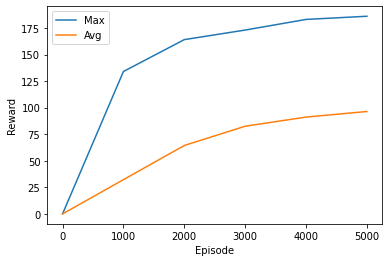

In [17]:
# TRANING
q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)

Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 5*10**3, timestep = 1000)

In [8]:
def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.2):
    rewards = 0
    solved = False 
    steps = 0 
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)] 
    
    for episode in range(1,episodes+1):
        
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        temp_start = time.time()
        
        while not done:
            steps += 1 
            ep_start = time.time()
            #if episode%timestep == 0:
            #env.render()
                
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)

            score += reward
            

            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > 195 and steps >= 100 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
            #print((episode, score))
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 195: 
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0] 
            
    if len(ep) == len(data['max']):
        plt.plot(ep, data['max'], label = 'Max')
        plt.plot(ep, data['avg'], label = 'Avg')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend(loc = "upper left")
        
    env.close()

Episode : 1000 | Reward -> 104.83 | Max reward : 190 | Time : 0.0
Episode : 2000 | Reward -> 109.314 | Max reward : 192 | Time : 0.0
Solved in episode : 2686 in time 0.0
Episode : 3000 | Reward -> 114.493 | Max reward : 196 | Time : 0.0
Episode : 4000 | Reward -> 117.096 | Max reward : 195 | Time : 0.0
Episode : 5000 | Reward -> 119.316 | Max reward : 191 | Time : 0.0


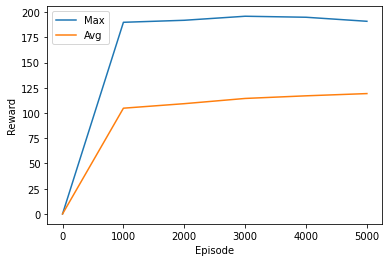

In [18]:
# env = gym.make('CartPole-v0')
Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 5*10**3, timestep = 1000)

Solved in episode : 920 in time 0.0
Episode : 1000 | Reward -> 121.323 | Max reward : 198 | Time : 0.0
Episode : 2000 | Reward -> 127.324 | Max reward : 195 | Time : 0.0
Episode : 3000 | Reward -> 131.313 | Max reward : 197 | Time : 0.0
Episode : 4000 | Reward -> 135.601 | Max reward : 199 | Time : 0.0
Episode : 5000 | Reward -> 132.218 | Max reward : 199 | Time : 0.0


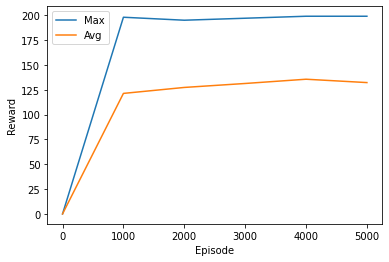

In [19]:
# env = gym.make('CartPole-v0')
Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 5*10**3, timestep = 1000)

In [21]:
Q_learning2(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 20, timestep = 1000)

In [13]:
def Q_learning2(q_table, bins, episodes = 10, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.2):
    rewards = 0
    solved = False 
    steps = 0 
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)] 
    
    for episode in range(1,episodes+1):
        
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        temp_start = time.time()
        
        while not done:
            steps += 1 
            ep_start = time.time()
            #if episode%timestep == 0:
            env.render()
                
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)

            score += reward
            

            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > 195 and steps >= 100 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
            #print((episode, score))
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 195: 
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0] 
            
    env.close()